###### Contenido bajo licencia Creative Commons Attribution CC-BY 4.0, código bajo licencia BSD 3-Clause © 2017 L.A. Barba, N.C. Clementi

# Regresión lineal con datos reales

## Temperatura de la tierra en el tiempo

En esta lección, aplicaremos todo lo que hemos aprendido (y más) para analizar datos reales de la temperatura de la Tierra a lo largo del tiempo.

¿Está aumentando la temperatura global? ¿Cuánto? ¡Esta es una cuestión de gran importancia en el mundo de hoy!

Los datos sobre las temperaturas globales están disponibles en varias fuentes: NASA, el Centro Nacional de Datos Climáticos (NCDC) y la Universidad de East Anglia en el Reino Unido. Consulta la [Corporación Universitaria de Investigación Atmosférica](https://www2.ucar.edu/climate/faq/how-much-has-global-temperature-risen-last-100-years) (UCAR) para un discusión profunda

El [Centro Goddard de Vuelos Espaciales de la NASA](http://svs.gsfc.nasa.gov/goto?3901) es una de estas fuentes de datos climáticos globales. Ellos produjeron el siguiente video que muestra un mapa de colores de las cambiantes **anomalías de temperatura de la superficie** de 1880 a 2015.

El término [anomalía de temperatura global](https://www.ncdc.noaa.gov/monitoring-references/faq/anomalies.php) se aplica a la diferencia de temperatura con respecto a un valor de referencia o un promedio a largo plazo. Es una forma muy útil de ver el problema y, en muchos sentidos, mejor que la temperatura absoluta. Por ejemplo, un mes de invierno puede ser más frío que el promedio en Washington DC, y también en Miami, pero las temperaturas absolutas serán diferentes en ambos lugares.

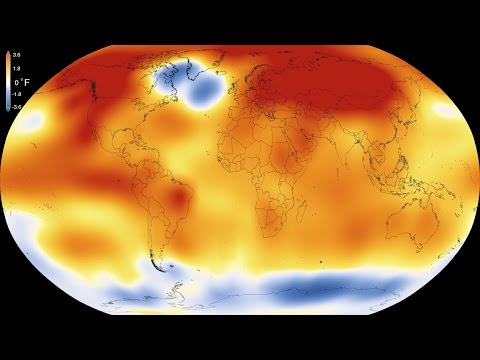

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('gGOzHVUQCw0')

¿Cómo podríamos entender las _tendencias_ de los datos de temperatura global?

El primer paso para analizar datos desconocidos es generar algunos gráficos simples utilizando **Matplotlib**. Vamos a ver el historial de anomalías de temperatura, contenido en un archivo, y hacemos nuestro primer diagrama para explorar estos datos.

Vamos a suavizar los datos y luego ajustaremos una línea para encontrar una tendencia, trazando a lo largo del camino para ver cómo se ve todo.

¡Empecemos!

## Paso 1: lee un archivo de datos

Tomamos los datos de la página web [NOAA](https://www.ncdc.noaa.gov/cag/) (National Oceanic and Atmospheric Administration - Administración Nacional Oceánica y Atmosférica). Siéntete libre de jugar con la página web y analizar datos por tu cuenta, pero por ahora, asegurémonos de que trabajamos con el mismo conjunto de datos.

Tenemos un archivo llamado `land_global_temperature_anomaly-1880-2016.csv` en nuestra carpeta` data`. Este archivo contiene el año en la primera columna y los promedios de la anomalía de la temperatura terrestre enumerados secuencialmente en la segunda columna, desde el año 1880 hasta 2016. Cargaremos el archivo, luego haremos una gráfica inicial para ver cómo se ve.

##### Nota:

Si descargó este bloc de notas solo, en lugar de la colección completa de este curso, es posible que no tenga el archivo de datos en la ubicación que suponemos a continuación. En ese caso, puede descargar los datos si agrega una celda de código y ejecuta el siguiente código en ella:

```Python
from urllib.request import urlretrieve
URL = 'http://go.gwu.edu/engcomp1data5?accessType=DOWNLOAD'
urlretrieve (URL, 'land_global_temperature_anomaly-1880-2016.csv')
```

El archivo de datos se descargará a su directorio de trabajo, y luego tendrá que eliminar la información de ruta, es decir, la cadena `'../../ data /'`, de la definición de la variable `fname` a continuación.

Comencemos importando NumPy.

In [2]:
import numpy

Para cargar nuestros datos desde el archivo, utilizaremos la función [`numpy.loadtxt()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html), que nos permite guardar inmediatamente los datos en matrices NumPy. (Le recomendamos que lea la documentación para obtener detalles sobre cómo funciona la función). Guardaremos los datos en las matrices `year` y` temp_anomaly`.

In [3]:
fname = '../data/land_global_temperature_anomaly-1880-2016.csv'

year, temp_anomaly = numpy.loadtxt(fname, delimiter=',', skiprows=5, unpack=True)

##### Ejercicio

Inspeccione los datos imprimiendo `year` y` temp_anomaly`.

## Paso 2: grafica los datos

Primero carguemos el módulo ** Matplotlib ** llamado `pyplot`, para hacer gráficos en 2D. Recuerda que para obtener los gráficos dentro del jupyter notebook, usamos un comando especial "mágico", `%matplotlib inline`:

In [4]:
from matplotlib import pyplot
%matplotlib inline

La función `plot()` del módulo `pyplot` hace gráficos de líneas simples. Evitaremos los textos que aparecieron en la parte superior de la figura, que dicen `Out [x]:[<...>]`, al agregar un punto y coma al final del comando de trazado.

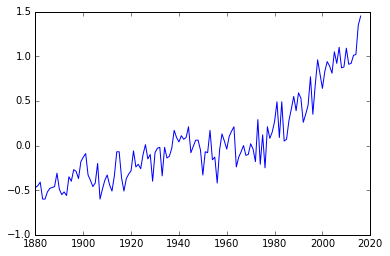

In [5]:
pyplot.plot(year, temp_anomaly);

Ahora tenemos un diagrama de líneas, pero si ve esta grafica sin ninguna información, ¡no podrás averiguar qué tipo de datos son! Necesitamos etiquetas en los ejes, un título y por qué no un mejor color, fuente y tamaño de los ticks.
Siempre debes apuntar a generar **gráficos de calidad de publicación**.
La forma en que presentes tus datos permitirá a otros (y probablemente a tí mismo en el futuro) comprender mejor tu trabajo.

Podemos personalizar el estilo de nuestras tramas usando **Matplotlib**'s [`rcParams`](https://matplotlib.org/api/matplotlib_configuration_api.html#matplotlib.rcParams). Esto nos permite establecer algunas opciones de estilo que se aplican a todos los gráficos que creamos en la sesión actual.
Por ejemplo, crearemos la fuente de un tamaño y tipo específico. También puedes personalizar otros parámetros como el ancho de línea, el color, etc. (consulta la documentación).

In [6]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Volveremos a hacer el mismo grafico, pero ahora agregaremos algunas cosas para que sea más bello y de **calidad de publicación**. Agregaremos un título, etiquetaremos los ejes y, mostraremos una cuadrícula de fondo. ¡Estudia los comandos a continuación y observa el resultado!

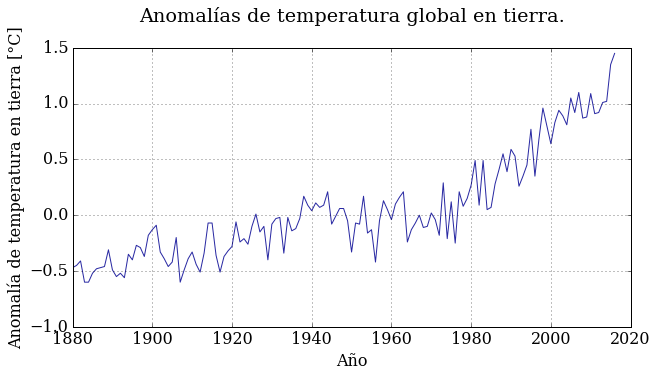

In [9]:
#You can set the size of the figure by doing:
pyplot.figure(figsize=(10,5))

#Plotting
pyplot.plot(year, temp_anomaly, color='#2929a3', linestyle='-', linewidth=1) 
pyplot.title('Anomalías de temperatura global en tierra.\n') # Land global temperature anomalies
pyplot.xlabel('Año') # Year
pyplot.ylabel('Anomalía de temperatura en tierra [°C]') # Land temperature anomaly
pyplot.grid();

¿Mucho mejor, no? Siéntete libre de jugar con los parámetros y ver cómo cambia el gráfico. No hay nada mejor que probar y equivocarse para entender el funcionamiento.

## Paso 3: Regresión lineal de mínimos cuadrados

Para tener una idea del comportamiento general de nuestros datos, podemos buscar una curva suave que (de manera aproximada) se ajuste a los puntos. Generalmente buscamos una curva que sea simple (por ejemplo, un polinomio) y no reproduzca el ruido que siempre está presente en los datos experimentales.

Sea $f(x)$ sea la función que ajustaremos a los $n+1$ puntos de datos: $(x_i, y_i)$, $i = 0, 1, ..., n$:

$$
    f (x) = f (x; a_0, a_1, ..., a_m)
$$

La notación anterior significa que $f$ es una función de $x$, con $m + 1$ parámetros variables $a_0, a_1, ..., a_m$, donde $m<n$. Necesitamos elegir la forma de $f(x)$ a priori, inspeccionando los datos experimentales y sabiendo algo sobre el fenómeno que hemos medido. Por lo tanto, el ajuste de curvas consta de dos pasos:

1. Elegir la forma de $f(x)$.
2. Calcular los parámetros que nos darán el "mejor ajuste" a los datos.

### ¿Cuál es el "mejor" ajuste?

Cuando el ruido en los datos está limitado a la coordinada $y$, es común usar el método de **ajuste de mínimos cuadrados**, lo que minimiza la función

$$
\begin{equation}
    S (a_0, a_1, ..., a_m) = \sum_ {i = 0} ^ {n} [y_i - f (x_i)] ^ 2
\end{equation}
$$

con respecto a cada $ a_j $. Encontramos los valores de los parámetros que mejor se ajustan al resolver las siguientes ecuaciones:

$$
\begin{equation}
    \frac {\partial {S}} {\partial {a_k}} = 0, \quad k = 0, 1, ..., m.
\end{equation}
$$

Aquí, los términos $ r_i = y_i - f (x_i) $ se llaman residuales: nos dicen la discrepancia entre los datos y la función de ajuste en $ x_i $.

Eche un vistazo a la función $ S $: lo que queremos minimizar es la suma de los cuadrados de los residuos. Las ecuaciones (2) son generalmente no lineales en $ a_j $ y pueden ser difíciles de resolver. Por lo tanto, la función de ajuste se elige comúnmente como una combinación lineal de funciones especificadas $ f_j (x) $,

$$
\begin{equation*}
    f (x) = a_0f_0 (x) + a_1f_1 (x) + ... + a_mf_m (x)
\end{equation*}
$$

que da como resultado que las ecuaciones (2) sean lineales. En el caso de que la función de ajuste sea polinómica, tenemos $ f_0 (x) = 1, \; f_1 (x) = x, \; f_2 (x) = x ^ 2 $, y así sucesivamente.

### Regresión lineal

Cuando hablamos de regresión lineal nos referimos a "ajustar una línea recta a los datos". Así,

$$
\begin{equation}
    f (x) = a_0 + a_1x
\end{equation}
$$

En este caso, la función que minimizaremos es:

$$
\begin{equation}
    S (a_0, a_1) = \sum_ {i = 0} ^ {n} [y_i - f (x_i)] ^ 2 = \sum_ {i = 0} ^ {n} (y_i - a_0 - a_1x_i) ^ 2
\end {ecuación}
$$

Las ecuaciones (2) se convierten en:

$$
\begin{equation}
    \frac {\partial {S}} {\partial {a_0}} = \sum_ {i = 0} ^ {n} -2 (y_i - a_0 - a_1x_i) = 2 \ left [a_0 (n + 1) + a_1 \sum_ {i = 0} ^ {n} x_i - \sum_ {i = 0} ^ {n} y_i \ right] = 0
\end{equation}
$$

$$
\begin{equation}
    \frac {\partial {S}} {\partial {a_1}} = \sum_ {i = 0} ^ {n} -2 (y_i - a_0 - a_1x_i) x_i = 2 \ left [a_0 \sum_ {i = 0 } ^ {n} x_i + a_1 \sum_ {i = 0} ^ {n} x_ {i} ^ 2 - \sum_ {i = 0} ^ {n} x_iy_i \ right] = 0
\end{equation}
$$

Dividamos ambas ecuaciones por $ 2 (n + 1) $ y reorganicemos los términos.

Reordenamiento (6) y (7):

$$
\begin{align}
    2 \ left [a_0 (n + 1) + a_1 \sum_ {i = 0} ^ {n} x_i - \sum_ {i = 0} ^ {n} y_i \ right] & = 0 \ nonumber \\
    \frac {a_0 (n + 1)} {n + 1} + a_1 \frac {\sum_ {i = 0} ^ {n} x_i} {n + 1} - \frac {\sum_ {i = 0} ^ {n} y_i} {n + 1} & = 0 \\
\end{align}
$$

$$
\begin{align}
    a_0 = \ bar {y} - a_1 \ bar {x}
\end{align}
$$

donde $ \ bar {x} = \frac {\sum_ {i = 0} ^ {n} x_i} {n + 1} $ y $ \ bar {y} = \frac {\sum_ {i = 0} ^ { n} y_i} {n + 1} $.

Reordenamiento (7):

$$
\begin{align}
    2 \ left [a_0 \sum_ {i = 0} ^ {n} x_i + a_1 \sum_ {i = 0} ^ {n} x_ {i} ^ 2 - \sum_ {i = 0} ^ {n} x_iy_i \ derecha] & = 0 \\
    a_0 \sum_ {i = 0} ^ {n} x_i + a_1 \sum_ {i = 0} ^ {n} x_ {i} ^ 2 - \sum_ {i = 0} ^ {n} x_iy_i & = 0 \\
\end{align}
$$

Ahora, si reemplazamos $ a_0 $ de la ecuación (8) en (9) y reorganizamos los términos:

$$
\begin{align*}
    (\ bar {y} - a_1 \ bar {x}) \sum_ {i = 0} ^ {n} x_i + a_1 \sum_ {i = 0} ^ {n} x_ {i} ^ 2 - \sum_ {i = 0} ^ {n} x_iy_i & = 0 \\
\end{align*}
$$

Reemplazar las definiciones de los valores promedio en la ecuación,

$$
\begin{align*}
    \ left [\frac {1} {n + 1} \sum_ {i = 0} ^ {n} y_i - \frac {a_1} {n + 1} \sum_ {i = 0} ^ {n} x_i \ right ] \sum_ {i = 0} ^ {n} x_i + a_1 \sum_ {i = 0} ^ {n} x_ {i} ^ 2 - \sum_ {i = 0} ^ {n} x_iy_i & = 0 \\
     \frac {1} {n + 1} \sum_ {i = 0} ^ {n} y_i \sum_ {i = 0} ^ {n} x_i - \frac {a_1} {n + 1} \sum_ {i = 0} ^ {n} x_i \sum_ {i = 0} ^ {n} x_i + a_1 \sum_ {i = 0} ^ {n} x_ {i} ^ 2 - \sum_ {i = 0} ^ {n} x_iy_i & = 0 \\
\end{align*}
$$

Dejando todo en términos de $ \ bar {x} $,

$$
\begin{align*}
    \sum_ {i = 0} ^ {n} y_i \ bar {x} - a_1 \sum_ {i = 0} ^ {n} x_i \ bar {x} + a_1 \sum_ {i = 0} ^ {n} x_ {i} ^ 2 - \sum_ {i = 0} ^ {n} x_iy_i = 0
\end{align*}
$$

Agrupando los términos que tienen $a_1$ en el lado izquierdo y el resto en el lado derecho:

$$
\begin{align*}
    a_1 \ left [\sum_ {i = 0} ^ {n} x_ {i} ^ 2 - \sum_ {i = 0} ^ {n} x_i \ bar {x} \ right] & = \sum_ {i = 0 } ^ {n} x_iy_i - \sum_ {i = 0} ^ {n} y_i \ bar {x} \\
    a_1 \sum_ {i = 0} ^ {n} (x_ {i} ^ 2 - x_i \ bar {x}) & = \sum_ {i = 0} ^ {n} (x_iy_i - y_i \ bar {x}) \\
    a_1 \sum_ {i = 0} ^ {n} x_ {i} (x_ {i} - \ bar {x}) & = \sum_ {i = 0} ^ {n} y_i (x_i - \ bar {x} )
\end{align*}
$$

Finalmente, obtenemos:

$$
\begin{align}
    a_1 = \frac {\sum_ {i = 0} ^ {n} y_ {i} (x_i - \ bar {x})} {\sum_ {i = 0} ^ {n} x_i (x_i - \ bar {x })}
\end{align}
$$

Entonces nuestros coeficientes son:

$$
\begin{align}
    a_1 = \frac {\sum_ {i = 0} ^ {n} y_ {i} (x_i - \bar{x})} {\sum_ {i = 0} ^ {n} x_i (x_i - \bar{x})} \quad, \quad a_0 = \bar{y} - a_1 \bar{x}
\end{align}
$$

### ¡Vamos a ajustar (parámetros)!

Ahora ajustaremos una línea recta a través de los datos de anomalías de temperatura para ver la tendencia en el tiempo. Utilizaremos la regresión lineal de mínimos cuadrados para encontrar la pendiente y la intersección de una línea

$$ y = a_1 x + a_0 $$

que se ajusta a nuestros datos.

En nuestro caso, el dato en `x` corresponde al año (`year`), y el dato en `y` es la anomalia en la temperatura (` temp_anomaly`). Para calcular nuestros coeficientes con la fórmula anterior, necesitamos los valores medios de nuestros datos. Sólo necesitaremos calcular la media para `x` e `y`, pero podría ser útil escribir una _función_ de Python personalizada que calcule la media de cualquier matriz, y así luego podemos reutilizarla.

Es una buena práctica de codificación *evitar la repetición*: queremos escribir código que sea reutilizable, no sólo porque lleva a menos tipeo sino también porque reduce los errores. Si te encuentras realizando el mismo cálculo varias veces, es mejor encapsularlo en una *función*.

Recuerde el _concepto clave_ de la [Lección 1](http://go.gwu.edu/engcomp1lesson1): Una función es una colección compacta de código que ejecuta alguna acción en sus argumentos.

Una vez *definida*, puedes *llamar* a una función tantas veces como desees. Cuando *llamamos* a una función, ejecutamos todo el código dentro de la función. El resultado de la ejecución depende de la *definición* de la función y de los valores *pasados* en ella como *argumentos*. Las funciones pueden o no *devolver* valores en su última operación.

La sintaxis para definir funciones de Python personalizadas es:

```python
def function_name (arg_1, arg_2, ...):
    '''
    docstring: descripción de la función
    '''
    <cuerpo de la función>
```

El **docstring** (texto de documentación) de una función es un mensaje del programador que documenta lo que se construyó. Un docstrings debe ser descriptivo y conciso. Son importantes porque explican (o recuerdan) el uso previsto de la función para los usuarios. Más adelante puede acceder a la cadena de documentación de una función usando la función `help()` y pasando el nombre de la función. Si está en una libreta, también puede anteponer un signo de interrogación `?` antes del nombre de la función y ejecutar en una celda para mostrar la información de una función.

¡Intentalo!

In [10]:
?print

Usando la función `help` en su lugar:

In [11]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



Definamos una función personalizada que calcula el valor medio de cualquier matriz. Estudia el código a continuación con cuidado.

In [13]:
def mean_value(array):
    """ Calcular el valor peromedio de un array - Calculate the mean value of an array 
    
    Argumentos (Arguments)
    ---------
    array: array de Numpy (Numpy array) 
    
    Regresa (Returns)
    -------    
    mean: valor promedio de una array (mean value of the array)
    """
    sum_elem = 0
    for element in array:
            sum_elem += element # esto es equivalente a sum_elem = sum_elem + element
    
    mean = sum_elem / len(array)
    
    return mean
    

Una vez que se ejecuta la celda de arriba, la función `mean_value()` está disponible para usar en cualquier argumento del tipo correcto. Esta función funciona en arreglos de cualquier longitud. Podemos intentarlo ahora con nuestros datos.

In [14]:
year_mean = mean_value(year)
print(year_mean)

1948.0


In [15]:
temp_anomaly_mean = mean_value(temp_anomaly)
print(temp_anomaly_mean)

0.0526277372263


¡Genial! Aprendiste cómo escribir una función de Python, y creamos una función para calcular el valor medio de una matriz de números. No teníamos que hacerlo, porque NumPy tiene una función incorporada para hacer exactamente lo que necesitamos: [`numpy.mean()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.mean.html).

##### Ejercicio

Calcule la media de las matrices `year` y` temp_anomaly` utilizando la función incorporada de NumPy, y compare los resultados con los obtenidos utilizando nuestra función personalizada `mean_value`.

Ahora que tenemos valores medios, podemos calcular nuestros coeficientes siguiendo las ecuaciones (12). Primero calculamos $ a_1 $ y luego usamos ese valor para calcular $ a_0 $.

Nuestros coeficientes son:

$$
    a_1 = \frac {\sum_ {i = 0} ^ {n} y_ {i} (x_i - \bar{x})} {\sum_ {i = 0} ^ {n} x_i (x_i - \bar{x})} \quad, \quad a_0 = \bar{y} - a_1 \bar{x}
$$

Ya calculamos los valores medios de las matrices de datos, pero la fórmula requiere dos sumas sobre nuevas matrices. Pero adivina, NumPy tiene una función incorporada para eso: [`numpy.sum()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html). Estudia el código a continuación.

In [16]:
a_1 = numpy.sum(temp_anomaly*(year - year_mean)) / numpy.sum(year*(year - year_mean)) 

In [17]:
print(a_1)

0.0103702839435


In [18]:
a_0 = temp_anomaly_mean - a_1*year_mean

In [19]:
print(a_0)

-20.1486853847


##### Ejercicio

Escribe una función que calcule los coeficientes, llama a esta función para calcularlos y compara el resultado con los valores que obtuvimos antes. Como una pista, te damos la estructura que debes seguir:

```python
de coeficients(x, y, x_mean, y_mean):
    """
    Escribir docstrings aquí
    """
    a_1 =
    a_0 =
    
    returns a_1, a_0
```

Ahora tenemos los coeficientes de la función lineal que mejor se ajusta a nuestros datos. Con ellos, podemos calcular los valores predichos de anomalía de temperatura, de acuerdo con nuestro ajuste. Verifica nuevamente las ecuaciones anteriores: los valores que vamos a calcular son $f(x_i)$.

Llamemos a `reg` la matriz obtenida al evaluar $f(x_i)$ para todos los años.

In [20]:
reg = a_0 + a_1 * year

Con los valores de nuestra regresión lineal, podemos trazarla sobre los datos originales para ver cómo se ven juntos. Estudia el código a continuación.

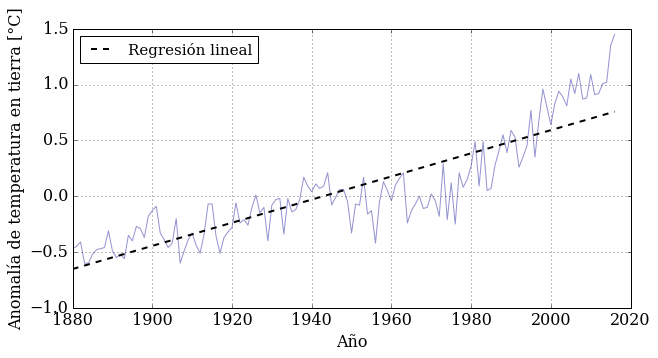

In [22]:
pyplot.figure(figsize=(10, 5))

pyplot.plot(year, temp_anomaly, color='#2929a3', linestyle='-', linewidth=1, alpha=0.5) 
pyplot.plot(year, reg, 'k--', linewidth=2, label='Regresión lineal')
pyplot.xlabel('Año')
pyplot.ylabel('Anomalía de temperatura en tierra [°C]')
pyplot.legend(loc='best', fontsize=15)
pyplot.grid();

## Paso 4: aplicar la regresión usando NumPy

Anteriormente codificamos la regresión lineal desde cero. Pero, ya habrás adivinado: no tuvimos que hacerlo porque NumPy tiene funciones integradas que cubren muchas de nuestras necesidades.

¡Sí! ¡Python y NumPy están aquí para ayudar! Con [`polyfit()`](https://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.polyfit.html), obtenemos la pendiente y el intercepto en $y$ de la línea que mejor se ajusta a los datos. Con [`poly1d()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.poly1d.html), podemos construir la función lineal desde su pendiente y su intercepto en $y$.

Observémoslo en acción:

In [23]:
# Primero ajustar con NumPy, y obtener los parámetros a_1n, a_0n:
a_1n, a_0n = numpy.polyfit(year, temp_anomaly, 1)

f_linear = numpy.poly1d((a_1n, a_0n)) 

In [24]:
print(a_1n)

0.0103702839435


In [25]:
print(a_0n)

-20.1486853847


In [26]:
print(f_linear)

 
0.01037 x - 20.15


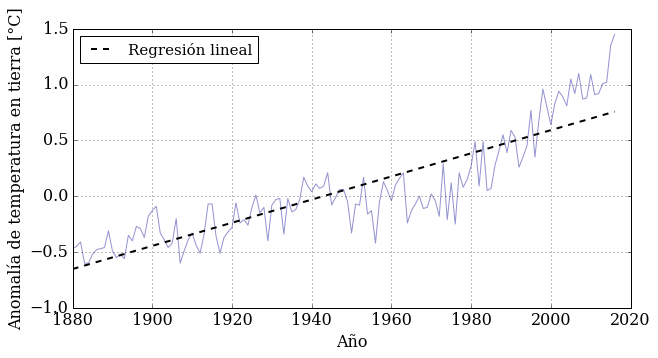

In [28]:
pyplot.figure(figsize=(10, 5))

pyplot.plot(year, temp_anomaly, color='#2929a3', linestyle='-', linewidth=1, alpha=0.5) 
pyplot.plot(year, f_linear(year), 'k--', linewidth=2, label='Regresión lineal')
pyplot.xlabel('Año')
pyplot.ylabel('Anomalía de temperatura en tierra [°C]')
pyplot.legend(loc='best', fontsize=15)
pyplot.grid();

## "Regresión dividida"

Si nos fijamos en el gráfico anterior, observarás que alrededor de 1970 la temperatura comienza a aumentar más rápido que la tendencia anterior. Una sola línea recta no nos dará un ajuste lo suficientemente bueno.

¿Qué pasa si dividimos los datos en dos (antes y después de 1970) y realizamos una regresión lineal en cada segmento?

Para hacer eso, necesitamos encontrar el puesto en nuestra matriz `year` donde se encuentra el año 1970. Afortunadamente, NumPy tiene una función llamada [`numpy.where()`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html) que nos puede ayudar. Pasamos una condición y `numpy.where()` nos dice en qué parte de la matriz la condición es `True`.

In [29]:
numpy.where(year==1970)

(array([90]),)

Para dividir los datos, usamos el poderoso instrumento de _slicing_ con la notación de dos puntos. Recuerde que un punto entre dos índices indica un rango de valores desde un 'inicio' hasta un 'final'. La regla es que `[start: end]` incluye el elemento en el índice `start` pero excluye el del índice` end`. Por ejemplo, para obtener los primeros 3 años en nuestra matriz `year`, hacemos:

In [30]:
year[0:3]

array([ 1880.,  1881.,  1882.])

Ahora sabemos cómo dividir nuestros datos en dos conjuntos, para obtener dos líneas de regresión. Necesitamos dos sectores de las matrices `year` y` temp_anomaly`, que guardaremos en los nuevos nombres de variables a continuación. Después de eso, completamos dos ajustes lineales utilizando las útiles funciones de NumPy que aprendimos anteriormente.

In [31]:
year_1 , temp_anomaly_1 = year[0:90], temp_anomaly[0:90]
year_2 , temp_anomaly_2 = year[90:], temp_anomaly[90:]

m1, b1 = numpy.polyfit(year_1, temp_anomaly_1, 1)
m2, b2 = numpy.polyfit(year_2, temp_anomaly_2, 1)

f_linear_1 = numpy.poly1d((m1, b1))
f_linear_2 = numpy.poly1d((m2, b2))

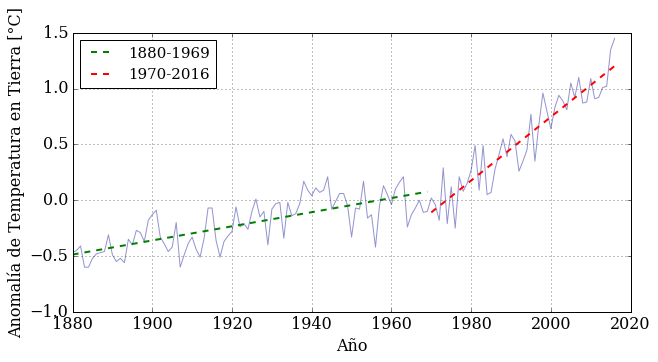

In [33]:
pyplot.figure(figsize=(10, 5))

pyplot.plot(year, temp_anomaly, color='#2929a3', linestyle='-', linewidth=1, alpha=0.5) 
pyplot.plot(year_1, f_linear_1(year_1), 'g--', linewidth=2, label='1880-1969')
pyplot.plot(year_2, f_linear_2(year_2), 'r--', linewidth=2, label='1970-2016')

pyplot.xlabel('Año')
pyplot.ylabel('Anomalía de Temperatura en Tierra [°C]')
pyplot.legend(loc='best', fontsize=15)
pyplot.grid();

Tenemos dos curvas diferentes para dos secciones diferentes de nuestro conjunto de datos. Un pequeño problema con esto es que el punto final de nuestra primera regresión no coincide con el punto de partida de la segunda regresión. Hicimos esto con el propósito de aprender, pero no es rigurosamente correcto. Lo arreglaremos en el próximo módulo del curso cuando aprendamos más sobre los diferentes tipos de regresión.

## Aprendimos:

* Hacer nuestros gráficos más bellos
* Definir y llamar funciones de Python personalizadas
* Aplicar regresión lineal a datos
* Funciones nativas de NumPy para regresión lineal
* ¡¡La Tierra se está calentando !!!

## Referencias
1. [_Essential skills for reproducible research computing_](https://barbagroup.github.io/essential_skills_RRC/) (Habilidades esenciales para la informática de investigación reproducible, 2017). Lorena A. Barba,  Natalia C. Clementi, Gilbert Forsyth. 
2. _Numerical Methods in Engineering with Python 3_ (Métodos numéricos en ingeniería con Python 3, 2013). Jaan Kiusalaas. Cambridge University Press.
3. _Effective Computation in Physics: Field Guide to Research with Python_ (Cálculo eficaz en física: Guía de campo para la investigación con Python, 2015). Anthony Scopatz & Kathryn D. Huff. O'Reilly Media, Inc.

In [28]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../style/custom.css'
HTML(open(css_file, "r").read())